### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
m = np.arange(12).reshape((3,4))
print(m)
for i in range(len(m)):
    print("\nRow {}: {}".format(i,m[i]))
    print("Mean: {}".format(np.mean(m[i])))
for i in range(len(m[0])):
    print("\nColumn {}: {}".format(i,m[:,i]))
    print("Mean: {}".format(np.mean(m[:,i])))

print("\nMean of matrix: {}".format(np.mean(m)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Row 0: [0 1 2 3]
Mean: 1.5

Row 1: [4 5 6 7]
Mean: 5.5

Row 2: [ 8  9 10 11]
Mean: 9.5

Column 0: [0 4 8]
Mean: 4.0

Column 1: [1 5 9]
Mean: 5.0

Column 2: [ 2  6 10]
Mean: 6.0

Column 3: [ 3  7 11]
Mean: 7.0

Mean of matrix: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#outer function
print("Outer product with outer function: \n {}".format(np.outer(u,v)))

#list comprehension
lc = [[u[i]*v[j] for j in range(len(v))] for i in range(len(u))]
print("\nOuter product with list comprehension: \n {}".format(np.array(lc)))

#broadcasting operation
print("\nOuter product with numpy broadcasting operatoins: \n {}".format(u[:, np.newaxis] * v))

Outer product with outer function: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product with list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product with numpy broadcasting operatoins: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
import numpy.random as npr
npr.seed(205678)

In [5]:
np.set_printoptions(precision = 6)
rand = npr.rand(10,6)
print(rand)
mask = (rand < 0.1)
for i in range(len(rand)):
    if np.any(mask[i]): rand[i] = 0
print("\n",rand)

[[0.446684 0.314525 0.883259 0.124388 0.369293 0.568558]
 [0.022448 0.637871 0.459868 0.034811 0.496636 0.564395]
 [0.378246 0.087029 0.963222 0.302693 0.300236 0.008069]
 [0.229642 0.747332 0.815886 0.826082 0.149542 0.793661]
 [0.734747 0.879986 0.172885 0.832765 0.180146 0.688919]
 [0.436083 0.381662 0.997904 0.206513 0.569185 0.029795]
 [0.308013 0.895189 0.055545 0.724579 0.449406 0.183113]
 [0.272154 0.8448   0.697147 0.479428 0.503569 0.58385 ]
 [0.424618 0.264915 0.801627 0.164399 0.251482 0.790556]
 [0.20856  0.494377 0.698666 0.77472  0.855266 0.00516 ]]

 [[0.446684 0.314525 0.883259 0.124388 0.369293 0.568558]
 [0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.      ]
 [0.229642 0.747332 0.815886 0.826082 0.149542 0.793661]
 [0.734747 0.879986 0.172885 0.832765 0.180146 0.688919]
 [0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.      ]
 [0.272154 0.8448   0.697147

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.       0.063467 0.126933 0.1904   0.253866 0.317333 0.380799 0.444266
 0.507732 0.571199 0.634665 0.698132 0.761598 0.825065 0.888531 0.951998
 1.015464 1.078931 1.142397 1.205864 1.26933  1.332797 1.396263 1.45973
 1.523196 1.586663 1.650129 1.713596 1.777063 1.840529 1.903996 1.967462
 2.030929 2.094395 2.157862 2.221328 2.284795 2.348261 2.411728 2.475194
 2.538661 2.602127 2.665594 2.72906  2.792527 2.855993 2.91946  2.982926
 3.046393 3.109859 3.173326 3.236792 3.300259 3.363725 3.427192 3.490659
 3.554125 3.617592 3.681058 3.744525 3.807991 3.871458 3.934924 3.998391
 4.061857 4.125324 4.18879  4.252257 4.315723 4.37919  4.442656 4.506123
 4.569589 4.633056 4.696522 4.759989 4.823455 4.886922 4.950388 5.013855
 5.077321 5.140788 5.204254 5.267721 5.331188 5.394654 5.458121 5.521587
 5.585054 5.64852  5.711987 5.775453 5.83892  5.902386 5.965853 6.029319
 6.092786 6.156252 6.219719 6.283185]

 [0.       0.634665 1.26933  1.903996 2.538661 3.173326 3.807991 4.442656
 5.077321 5.

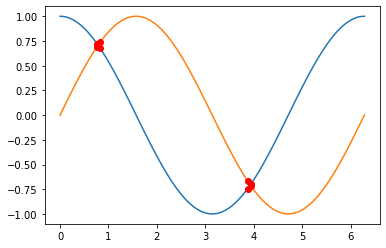

In [6]:
np.set_printoptions(precision = 6)
a = np.linspace(0, 2*np.pi ,100)
print(a)

print("\n",a[::10])

#b = a[99 - np.arange(100)]
b = a[::-1]
print("\n", b)

c = [val for val in a if abs(np.cos(val)-np.sin(val)) < 0.1]
print("\n", c)

sin = [np.sin(val) for val in a]
cos = [np.cos(val) for val in a]

c1 = np.array([np.sin(val) for val in c])
c2 = np.array([np.cos(val) for val in c])

plt.plot(a, cos, a, sin, c, c1, 'ro', c, c2, 'ro')
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [7]:
a = np.arange(1,11)
b = np.outer(a,a)
print("10 x 10 multiplication matrix: \n{}".format(b))

print("\nTrace of the matrix: {}".format(b.trace()))

l = np.arange(10)
print("\nAnti-diagonal: {}".format(b[l,l[::-1]]))

l = np.arange(9)
print("\nOffset 1 diagonal: {}".format(b[l,l+1]))

10 x 10 multiplication matrix: 
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of the matrix: 385

Anti-diagonal: [10 18 24 28 30 30 28 24 18 10]

Offset 1 diagonal: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [8]:
cities = np.array(["Chicago","Springfield","Saint-Louis","Tulsa","Oklahoma City","Amarillo","Santa Fe","Albuquerque","Flagstaff","Los Angeles"])
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = abs(positions[:,np.newaxis] - positions)
print("Distances in miles: \n{}".format(distances))
np.set_printoptions(precision = 1)
print("Distances in km: \n{}".format(distances * 1.60934))

Distances in miles: 
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
Distances in km: 
[[   0.   318.6  487.6 1184.5 1401.7 1891.  2373.8 2484.8 3078.7 3939.7]
 [ 318.6    0.   169.   865.8 1083.1 1572.3 2055.1 2166.2 2760.  3621. ]
 [ 487.6  169.     0.   696.8  914.1 1403.3 1886.1 1997.2 2591.  3452. ]
 [1184.5  865.8  696.8    0.   217.3  706.5 1189.3 1300.3 1894.2 2755.2]
 [1401.7 1083.1  914.1  217.3    0.   489.2  972.  1083.1 1676.9 2537.9]
 [1891.  1572.3 1403.3  706.5  489.2    0.   482.8  593.8 1187.7 

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Time: 0.0001163482666015625

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]

Time: 0.0010602474212646484

[   2    3    5 ... 9949 9967 9973]

Time: 0.0073664188385009766

[    2     3     5 ... 99971 99989 99991]

Time: 0.06501483917236328

[     2      3      5 ... 999961 999979 999

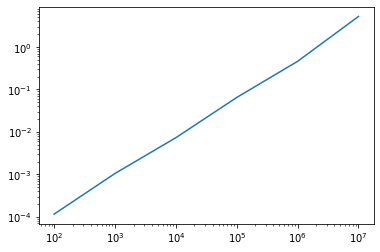

The time scales linearly with N.


In [9]:
import time
arr_N=[]
arr_t=[]
for N in [99,999,9999,99999,999999,9999999]:
    arr_N.append(N)
    mask = np.ones((N+1, ), dtype=bool)
    mask[0],mask[1] = False, False
    t0 = time.time()
    for i in range(2,int(N+1)):
        k = 2
        mask[i*k::i] = False
    t1 = time.time()
    num = np.arange(N+1)
    print(num[mask])
    arr_t.append(t1-t0)
    print("\nTime: {}\n".format(t1-t0))
plt.plot(arr_N,arr_t)
plt.yscale('log')
plt.xscale('log')
plt.show()
print("The time scales linearly with N.")

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Time: 4.4345855712890625e-05

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 961 967 971 977 983 991 997]

Time: 4.363059997558594e-05

[   2    3    5 ... 9949 9967 9973]

Time: 0.00021529197692871094

[    2     3     5 ... 99971 99989 99991]

Time: 0.0005202293395996094

[     2      3      5 ... 999961 99

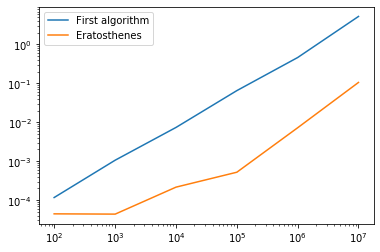

In [10]:
import time
import math as m
arr_N1=[]
arr_t1=[]
for N in [99,999,9999,99999,999999,9999999]:
    arr_N1.append(N)
    mask = np.ones((N+1, ), dtype=bool)
    mask[0],mask[1] = False,False
    t0 = time.time()
    for i in range(2,int(m.sqrt(N+1))):
        if mask[i] == True:
            mask[i**2::i] = False
    t1 = time.time()
    num = np.arange(N+1)
    print(num[mask])
    arr_t1.append(t1-t0)
    print("\nTime: {}\n".format(t1-t0))
plt.plot(arr_N,arr_t,label='First algorithm')
plt.plot(arr_N1,arr_t1,label='Eratosthenes')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [11]:
import numpy.random as npr

[[-1 -1 -1 ... -1  1 -1]
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1 -1 ...  1  1 -1]
 ...
 [ 1  1 -1 ...  1 -1  1]
 [ 1 -1 -1 ...  1 -1 -1]
 [ 1  1  1 ...  1 -1 -1]]

 [[  0  -1  -2 ... -13 -14 -13]
 [  0   1   0 ...  -9  -8  -9]
 [  0   1   0 ...   5   6   7]
 ...
 [  0   1   2 ...  -1   0  -1]
 [  0   1   0 ...  -5  -4  -5]
 [  0   1   2 ...  11  12  11]]

 [[  0   1   4 ... 169 196 169]
 [  0   1   0 ...  81  64  81]
 [  0   1   0 ...  25  36  49]
 ...
 [  0   1   4 ...   1   0   1]
 [  0   1   0 ...  25  16  25]
 [  0   1   4 ... 121 144 121]]

 [  0.    1.    2.    2.9   3.8   4.6   5.7   6.7   7.6   8.8  10.   11.
  12.1  13.5  15.   15.8  16.8  17.8  18.8  19.6  20.7  22.   23.2  24.3
  26.   26.6  26.9  27.7  28.4  29.3  30.1  31.   32.2  34.2  35.8  36.8
  37.7  38.5  39.7  40.7  41.8  43.   44.3  45.1  46.3  47.   48.7  49.9
  51.   52.4  53.5  54.4  55.8  56.1  55.8  57.2  58.8  59.   59.3  59.2
  61.2  61.2  61.9  63.   63.9  64.9  65.9  68.2  69.3  70.   70.3  70.4
  71.6  72.6  74.

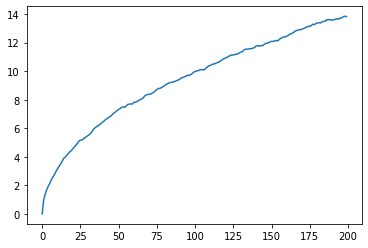

In [12]:
npr.seed(30485)
a = npr.randint(0,2,size = (1000,200))*2-1
print(a)
dist = np.array([[np.sum(a[i,:j]) for j in range(len(a[i]))] for i in range(len(a))])
print("\n",dist)
square = np.square(dist)
print("\n",square)
mean = np.array([np.mean(square[:,i]) for i in range(len(square[0]))])
print("\n",mean)
plt.plot(np.arange(len(a[0])),np.sqrt(mean))
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [13]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2021-11-22 12:45:43--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2021-11-22 12:45:43--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc68e77036684af1631fbf7d3739.dl.dropboxusercontent.com/cd/0/inline/Bacg8Upac3XM8ToGIEk3kTTH1FJcL2V3KdqxXqDvZP1zQBXiWozUpRk7iCWQQvYZvFablW5AZC8pnZoXswQYbpIWoPhT76fYHvfLudqITkh5VerqqftaCI8_AnV9jNxdx-B3Ixd6yOmxZx6O9Y75gjMu/file# [segue]
--2021-11-22 12:45:43--  https://uc68e77036684af1631fbf7d3739.dl.dropboxusercontent.com/cd/0/inline/Bacg8Upac3XM8ToGIEk3kTTH1FJcL2V3KdqxXqDvZP1zQBXiWozU

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


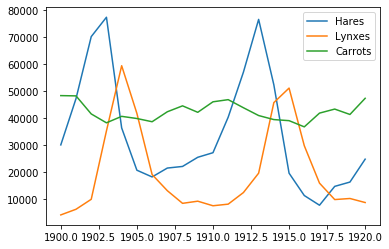


Mean population of hares from 1900 to 1920: 34080.95238095238
std: 20897.906458089667

Correlation between the populations of hares and lynxes: 0.07189206073535571

Correlation between the populations of hares and carrots: -0.016603777709879402

Mean population of lynxes from 1900 to 1920: 20166.666666666668
std: 16254.591536908763

Correlation between the populations of lynxes and carrots: -0.6805771698401617

Mean population of carrots from 1900 to 1920: 42400.0
std: 3322.5062255844787
In 1900 the species with the most population was ['carrots'].
In 1901 the species with the most population was ['carrots'].
In 1902 the species with the most population was ['hares'].
In 1903 the species with the most population was ['hares'].
In 1904 the species with the most population was ['lynxes'].
In 1905 the species with the most population was ['lynxes'].
In 1906 the species with the most population was ['carrots'].
In 1907 the species with the most population was ['carrots'].
In 1908 the spec

In [19]:
file_name = "populations.txt"
data = np.loadtxt(file_name,comments='#')
print(data)

names = np.array(["year", "hares", "lynxes", "carrots"])
year = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]
plt.plot(year,hares,label = "Hares")
plt.plot(year,lynxes,label = "Lynxes")
plt.plot(year,carrots,label = "Carrots")
plt.legend()
plt.show()

for i in range(1,4):
    print("\nMean population of {} from 1900 to 1920: {}".format(names[i],np.mean(data[:,i])))
    print("std: {}".format(np.std(data[:,i])))
    for j in range(i,4):
        if not i == j:
            print("\nCorrelation between the populations of {} and {}: {}".format(names[i],names[j],np.corrcoef(data[:,i],data[:,j])[0,1]))
            
for line in data:
    mass = max(line[1],line[2],line[3])
    index = np.where(line == mass)
    print("In {} the species with the most population was {}.".format(int(line[0]),names[index]))
    